In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
import math

In [2]:
df=pd.read_csv("concrete.csv")
df.shape

(1030, 9)

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.isnull().sum()
#no null values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
df.dtypes
#all features are numerical so the datatypes seems to be correct

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
print("There are "+str(len(df[df.duplicated(keep=False)]))+" duplicate values")
df[df.duplicated(keep=False)]

There are 36 duplicate values


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
27,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
49,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
96,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
190,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
333,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69


**We will keep the first occurrence of each of these values and delete the rest**

In [7]:
print("Therefore, we will delete "+str(len(df[df.duplicated(keep="first")]))+" duplicate values listed below: ")
df[df.duplicated(keep="first")]

Therefore, we will delete 25 duplicate values listed below: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [8]:
df.drop_duplicates(keep='first', inplace=True)
print("Dropped! There are "+str(len(df[df.duplicated(keep=False)]))+" duplicate values")
print(df.shape)
df[df.duplicated(keep=False)]

Dropped! There are 0 duplicate values
(1005, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [9]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### we have seen that we dont have null values, we have removed all the duplicates and the datatypes are also correct. We will now go column by column and understand their range, central tendencies, standard deviation and quartiles

**cement(weight of the cement mixed in kg):** the values lie b/w 102 to 540, with median at 265. Mean(278.63) and median are almost same hence this feature wouldnt be skewed. Standard deviation(104.34) seems to be pretty high hence the distribution should be spread out. 25% of the values lie below 190.7(25th percentile) and 75% of the values lie below 349(75th percentile).

**slag(weight of the slag mixed in kg):** the values lie b/w 0 to 359.4, with median at 20. Mean(72.04) and median are very different hence this feature would be highly skewed. Standard deviation(86.17) seems to be pretty high hence the distribution should be spread out. 25% of the values are 0(25th percentile) and 75% of the values lie below 142.5(75th percentile).

**ash(weight of the ash mixed in kg):** the values lie b/w 0 to 200, with median at 0. Mean(55.53) and median are very different hence this feature would be highly skewed. Standard deviation(64.20) seems to be pretty high hence the distribution should be spread out. 50% of the values are 0(50th percentile/median) and 75% of the values lie below 118.3(75th percentile).

**water(weight of the water mixed in kg):** the values lie b/w 121 to 247, with median at 185.7. Mean(182.07) and median are almostv same hence this feature wouldnt be skewed. Standard deviation(21.33) seems to be pretty high hence the distribution should be spread out. 25% of the values are below 166(25th percentile) and 75% of the values lie below 192.9(75th percentile).

**superplastic(weight of the superplastic mixed in kg):** the values lie b/w 0 to 32.2, with median at 6.1. Mean(6.03) and median are very same hence this feature wouldnt be highly skewed. Standard deviation(5.91) seems to be pretty high hence the distribution should be spread out. 25% of the values are 0(25th percentile) and 75% of the values lie below 10(75th percentile).

**coarseagg(weight of the Coarse Aggregate mixed in kg):** the values lie b/w 801 to 1145, with median at 968. Mean(974.37) and median are very same hence this feature wouldnt be highly skewed. Standard deviation(77.57) seems to be pretty high hence the distribution should be spread out. 25% of the values are below 932(25th percentile) and 75% of the values lie below 1031(75th percentile).

**fineagg(weight of the Fine Aggregate mixed in kg):** the values lie b/w 594 to 992, with median at 780. Mean(772.68) and median are very same hence this feature wouldnt be highly skewed. Standard deviation(80.43) seems to be pretty high hence the distribution should be spread out. 25% of the values are below 724(25th percentile) and 75% of the values lie below 822(75th percentile).

**age(age in number of days):** the values lie b/w 1 to 365, with median at 28. Mean(45.85) and median are very different hence this feature would be skewed. Standard deviation(63.73) seems to be pretty high hence the distribution should be spread out. 25% of the values are below 7(25th percentile) and 75% of the values lie below 56(75th percentile).

**strength(Concrete compressive strength measured in MPa):** This is the TARGET column

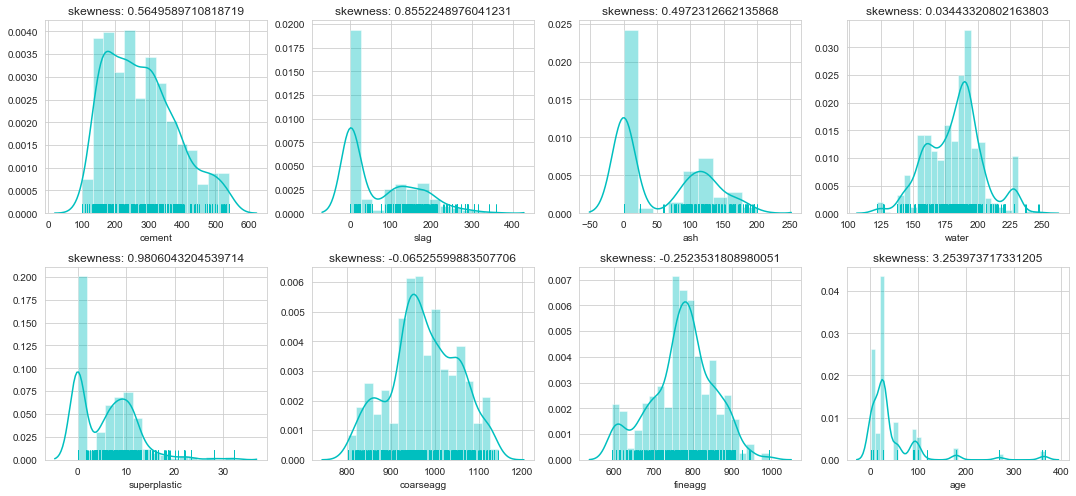

In [10]:
fig, ax =plt.subplots(nrows=2,ncols=4,figsize=(15, 7))

col=0
for i in range(0,2):
    for j in range(0,4):
        sns.distplot(a=df[df.columns[:-1][col]],ax=ax[i][j],color="c",rug=True)
        ax[i][j].set_title("skewness: "+str(df[df.columns[:-1][col]].skew()))
        col=col+1

fig.show()
plt.tight_layout()

**While describing the features we expected many features to have high skewness due to different mean and median but it turns out that except age we do not have much skewness in any of the features. Instead, the distributions that we expected to be skewed due to far means and medians turn out to be bimodal.**

In [11]:
for c in df[:-1].columns:
    print("#####-- "+c+" --#####")
    print(df[c].value_counts(normalize=True))
    print("---------------------------------------------------------")

#####-- cement --#####
251.4    0.014925
446.0    0.013930
310.0    0.013930
250.0    0.012935
475.0    0.012935
           ...   
276.4    0.000995
151.8    0.000995
164.2    0.000995
160.2    0.000995
158.6    0.000995
Name: cement, Length: 278, dtype: float64
---------------------------------------------------------
#####-- slag --#####
0.0      0.467662
189.0    0.015920
24.0     0.013930
20.0     0.011940
145.0    0.010945
           ...   
163.9    0.000995
160.5    0.000995
166.4    0.000995
186.7    0.000995
164.2    0.000995
Name: slag, Length: 185, dtype: float64
---------------------------------------------------------
#####-- ash --#####
0.0      0.538308
118.3    0.019900
141.0    0.015920
24.5     0.014925
79.0     0.013930
           ...   
90.3     0.000995
108.6    0.000995
194.9    0.000995
160.9    0.000995
89.6     0.000995
Name: ash, Length: 156, dtype: float64
---------------------------------------------------------
#####-- water --#####
192.0    0.117413
228.0  

**3 of the features are highlighted from the above analysis:<br> 1) slag: bimodal distribution. 46% of the values are 0.0 i.e no slag in the mixture<br> 2) ash: again bimodal distribution. 53.8% of the values are 0.0 (no ash in the mixture)<br> 3) superplastic: bimodal distribution. 37.6% of the values are 0.0 (no superplastic in the mixture)<br><br>We shall see in the later section that how should we use these features.**

# outliers detection

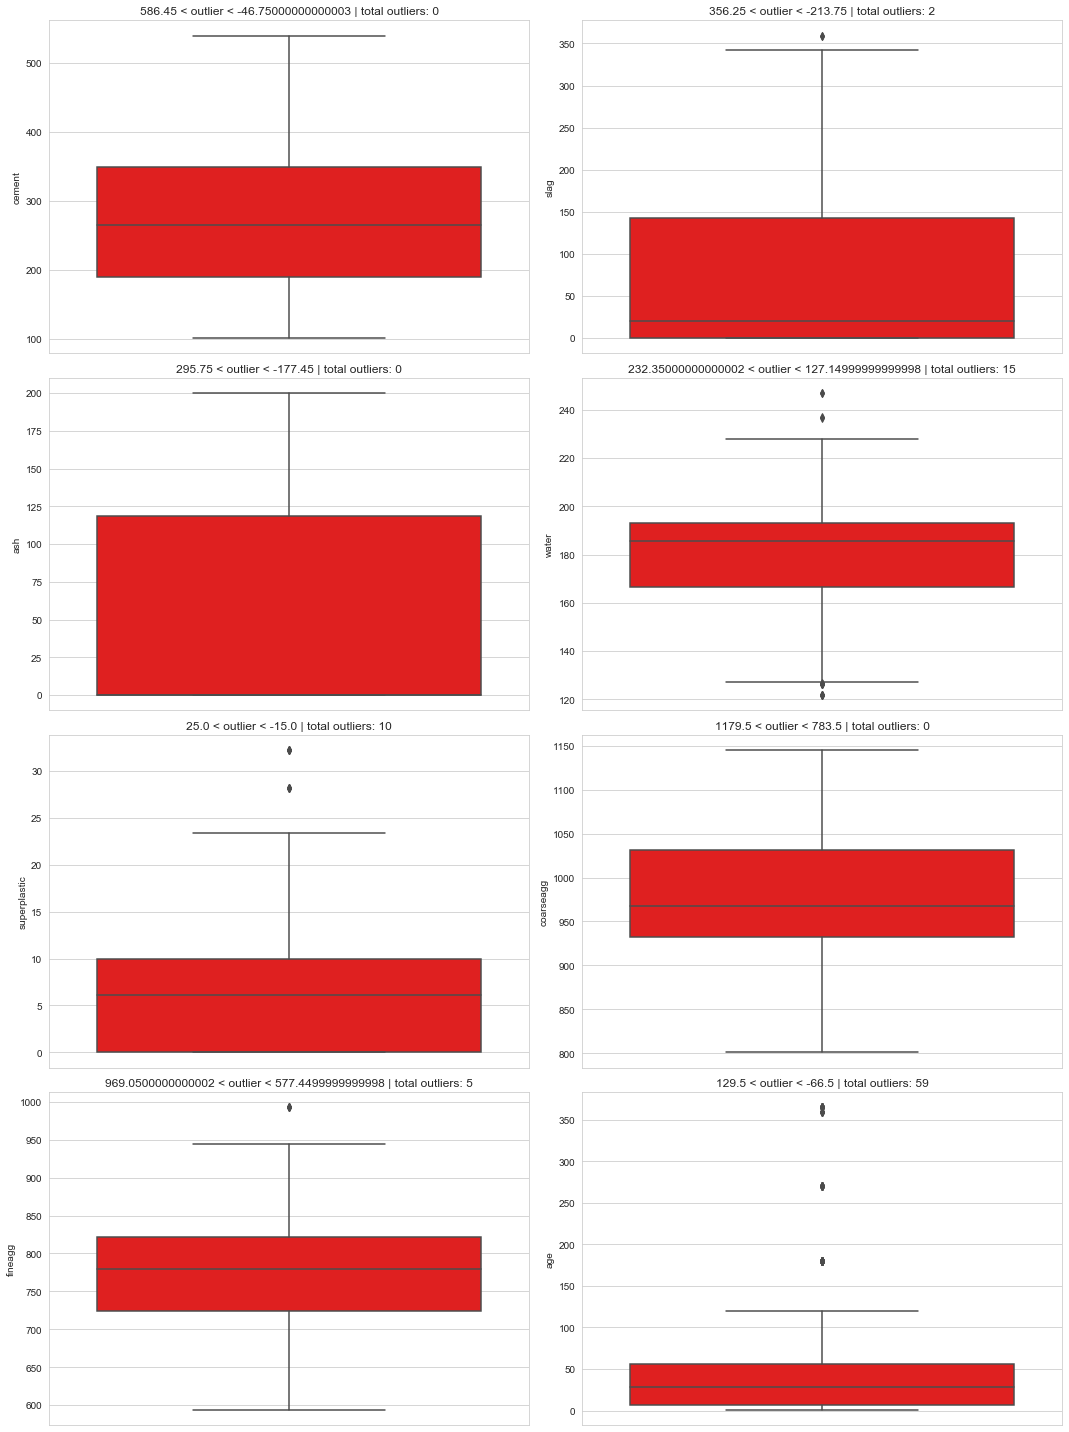

In [12]:
fig, ax =plt.subplots(nrows=4,ncols=2,figsize=(15, 20))

col=0
for i in range(0,4):
    for j in range(0,2):
        Q1 = np.percentile(a=df[df.columns[col]], q=25)
        Q3 = np.percentile(a=df[df.columns[col]], q=75)

        IQR = Q3 - Q1
        ul = Q3+(1.5*IQR) 
        ll = Q1-(1.5*IQR)
        total = len(df[(df[df.columns[col]]>ul) | (df[df.columns[col]]<ll)])

        sns.boxplot(y=df[df.columns[:-1][col]],data=df,ax=ax[i][j],color="red")
        ax[i][j].set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
        col=col+1

fig.show()
plt.tight_layout()

### we do have a few outliers but on further analysis we shall see how we will deal with certain columns and then we will come up with a suitable outlier treatment strategy.

# PART 1

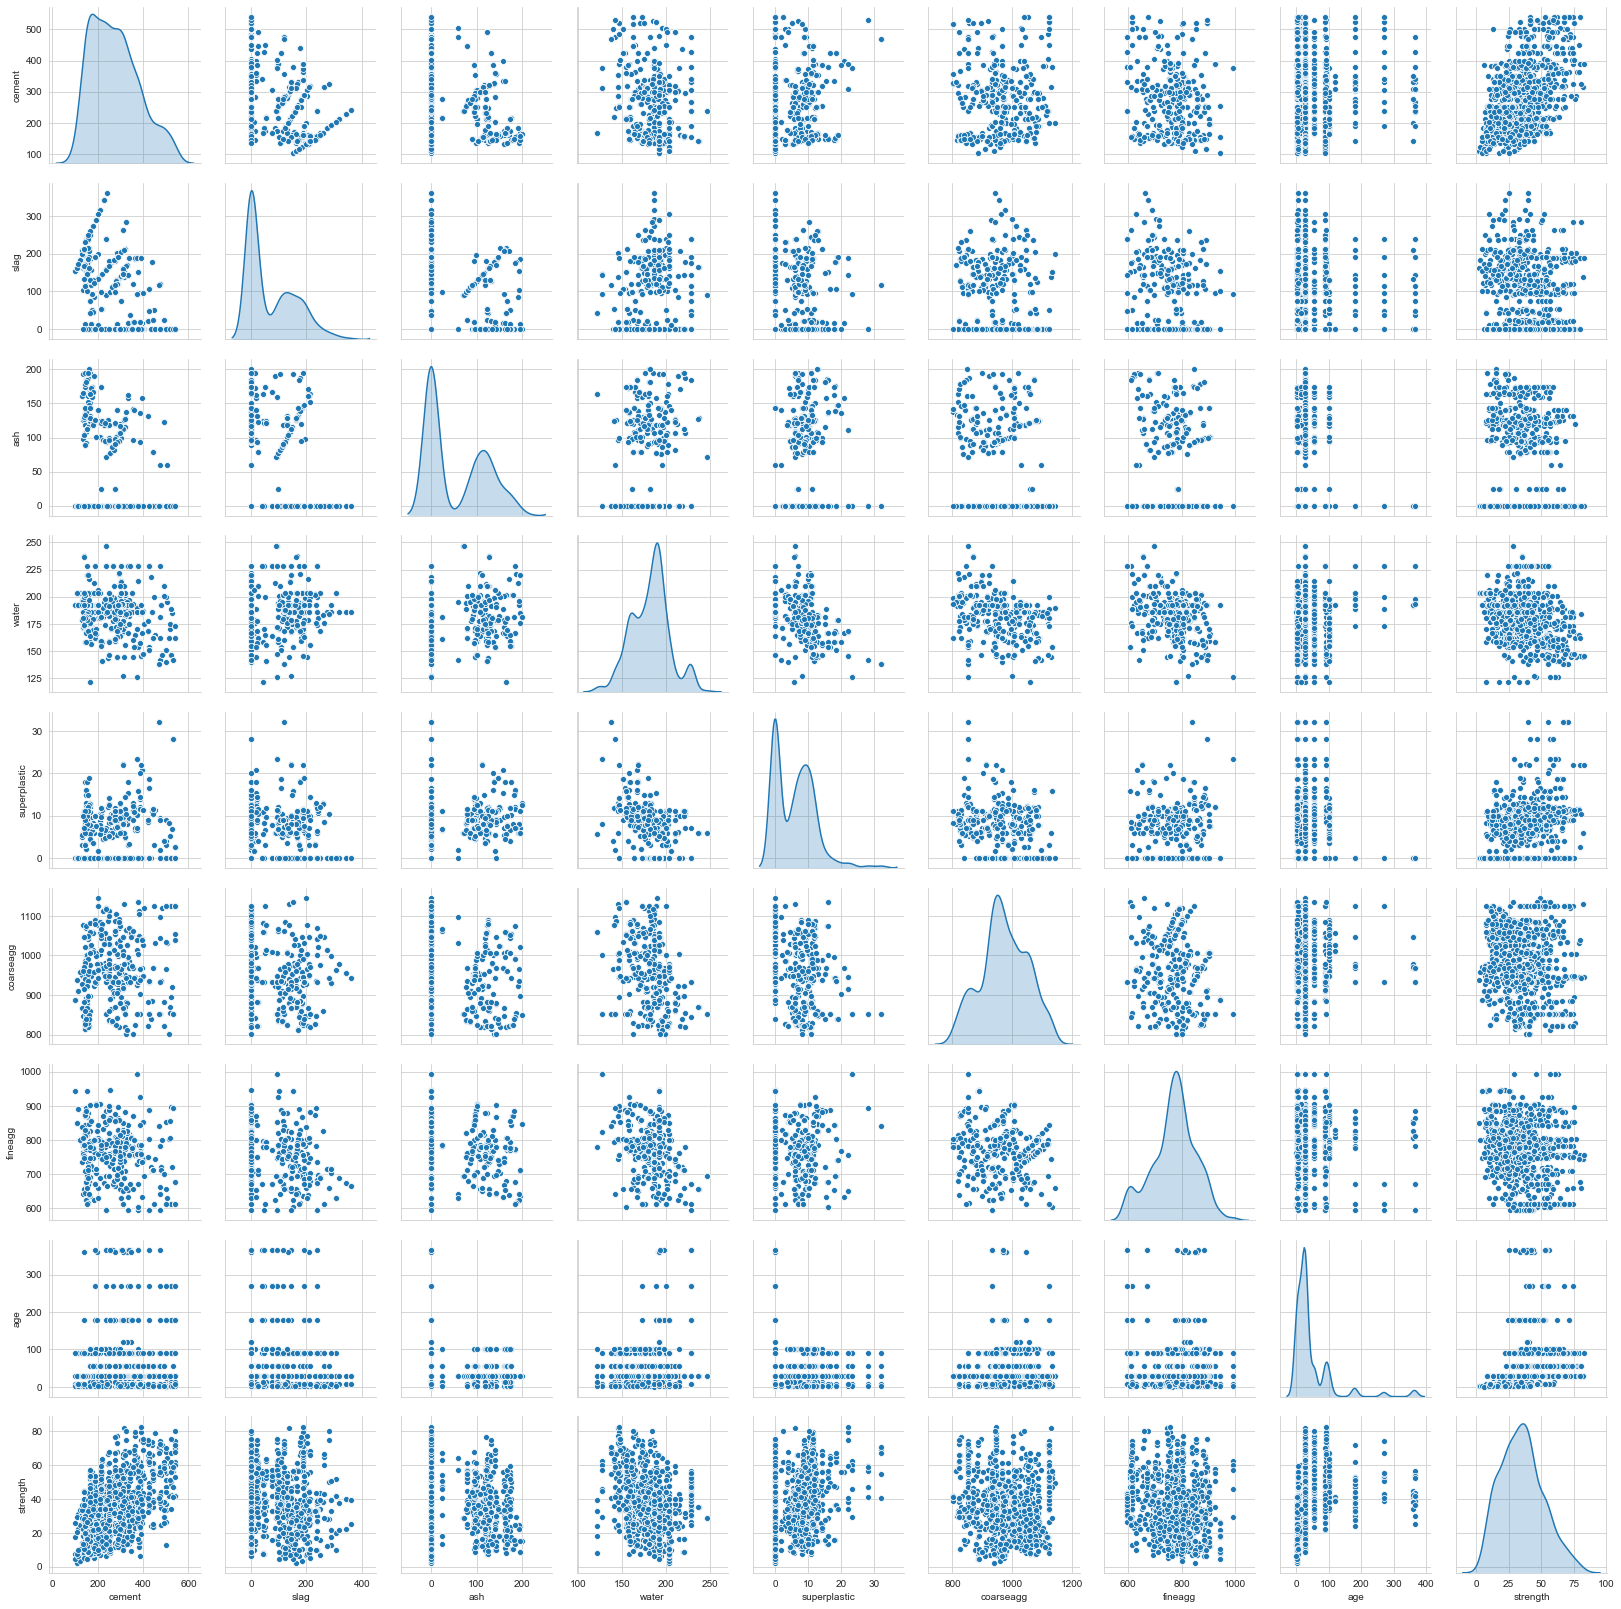

In [10]:
sns.pairplot(df,diag_kind='kde')

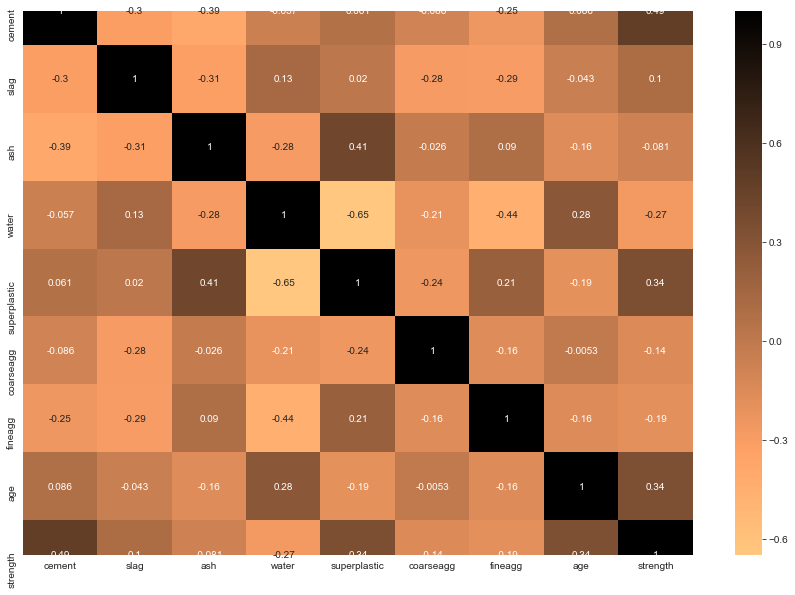

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'),annot=True,cmap="copper_r")

**We dont see any correlation among our features. superplastic and ash have some correlation but weak(0.41). Likewise weak correlation can be seen b/w ash,cement ash,slag water,fineagg.**<br>
**Water and superplastic however show moderate correlation of 0.65.**<br><br>
**Correlation of almost all the features with target variable is very weak except age, superplastic and cement showing some correlation. Cement and target column(strength) show a linear relationship. Looking at the relationship b/w target variable and other features we can say that "ash" will not play any role in the modelling.**

## In part 1 we will treat outliers by imputing the values above and below upper and lower limit by the values at the upper and lower limit to reduce the affect of outliers. Then we will transform the data using a robust scalar before modelling. Finally we will model the data by keeping all the features and then by removing the features that we think are not important.

As we have stated above that "ash" seems to be redundant feature for modelling, we will cement the finding by sklearns feature selection library. We will make use of f_regression. f_regression finds the important features using two steps:<br>1) computes correlation b/w each feature and target<br> 2) converts the them to f-value and p-value<br><br> In simpler words it assesses whether the variances of the feature and the target are equal. It is a hypothesis test and hence it will also return a p-value.

In [15]:
x=df.drop("strength", axis=1)
y=df["strength"] 

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
f_val,p_val = f_regression(x,y,center=True)

In [17]:
for col,fv,pv in zip(x.columns,f_val,p_val):
    print(col+": f_value = "+str(round(fv,4))+", p_value = "+str(pv))

cement: f_value = 314.0, p_value = 2.4620660646924946e-61
slag: f_value = 10.834, p_value = 0.0010312667997648605
ash: f_value = 6.5663, p_value = 0.010537557855623934
water: f_value = 78.6315, p_value = 3.362908876776773e-18
superplastic: f_value = 134.8071, p_value = 2.4842502244857752e-29
coarseagg: f_value = 21.4553, p_value = 4.097881292837744e-06
fineagg: f_value = 36.1229, p_value = 2.590051647593573e-09
age: f_value = 128.8197, p_value = 3.5719493008725753e-28


**As we expected f-value for ash is smallest. Weaker the correlation, smaller the f-value.<br>Also, larger the f-value, smaller will be the p-value.<br>If we keep a significance level at p = 0.05, we can conclude that p-values for all the features is less than the significance of 0.05. Which means that none of the features have significant correlation with the target variable. But still if we have to rank - ash will not provide much in modelling and has the least correlation with the target variable as compared to other features followed by slag, coarseagg and fineagg<br><br>Out of 8 features if we have to drop a feature, it will be ash. See below:**

In [18]:
sel_feat = SelectKBest(f_regression, k=7)
sel_feat.fit(x, y)

SelectKBest(k=7, score_func=<function f_regression at 0x0000019E93E6AAF8>)

In [19]:
sel_feat.get_support(True)

array([0, 1, 3, 4, 5, 6, 7], dtype=int64)

column at index 2(ash) was removed

In [20]:
print("selected features:")
df.columns[sel_feat.get_support(True)]

selected features:


Index(['cement', 'slag', 'water', 'superplastic', 'coarseagg', 'fineagg',
       'age'],
      dtype='object')

**lets model with and without ash to see if we are correct**

In [21]:
x_sc = pd.DataFrame(RobustScaler().fit_transform(x))
x_sc.columns = x.columns
x_sc.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.781428,1.347368,0.000000,0.676806,-0.61,0.038384,-0.321757,0.000000
1,-0.607075,0.155789,1.050719,-1.041825,0.47,1.139394,0.165475,-0.285714
2,-0.094757,-0.140351,0.808960,0.064639,-0.06,-0.112121,0.829418,0.000000
3,0.006317,0.659649,0.000000,1.608365,-0.61,-0.363636,-1.123596,0.000000
4,-0.696147,1.146667,0.000000,0.288973,0.30,0.802020,-0.850868,0.000000


**We will treat outliers by capping them to uuper and lower limit**

In [22]:
features_to_cap=['slag','water','superplastic','age','fineagg']

for feat in features_to_cap:
    
    Q1 = np.percentile(a=x_sc[feat], q=25)
    Q3 = np.percentile(a=x_sc[feat], q=75)
    IQR = Q3 - Q1
    ul = Q3+(1.5*IQR) 
    ll = Q1-(1.5*IQR)
    
    print("##### "+feat+" #####")
    print("lower limit: "+str(ll))
    print("upper limit: "+str(ul))
    print("total number of outliers to be treated: "+str(len(x_sc[(x_sc[feat]>ul) | (x_sc[feat]<ll)])))

    x_sc[feat][x_sc[feat]>ul] = ul
    x_sc[feat][x_sc[feat]<ll] = ll

    print("after removing outliers:")
    print(len(x_sc[(x_sc[feat]>ul) | (x_sc[feat]<ll)]))
    print("***************************************************************************************************************")

##### slag #####
lower limit: -1.6403508771929824
upper limit: 2.3596491228070176
total number of outliers to be treated: 2
after removing outliers:
0
***************************************************************************************************************
##### water #####
lower limit: -2.2262357414448664
upper limit: 1.7737642585551336
total number of outliers to be treated: 15
after removing outliers:
0
***************************************************************************************************************
##### superplastic #####
lower limit: -2.11
upper limit: 1.8900000000000001
total number of outliers to be treated: 10
after removing outliers:
0
***************************************************************************************************************
##### age #####
lower limit: -1.9285714285714286
upper limit: 2.071428571428571
total number of outliers to be treated: 59
after removing outliers:
0
****************************************************************

#### including ash

In [23]:
lr1 = LinearRegression()
lr1_scores = cross_val_score(lr1, x_sc, y, cv=5)
lr1_pred = cross_val_predict(lr1, x_sc, y, cv=5)

print(lr1_scores)
print("5-fold cv score: "+str(lr1_scores.mean()))

rmse = math.sqrt(np.mean((lr1_pred-y)**2))
print("root mean squared error: "+str(rmse))

[0.69609218 0.76626009 0.71491696 0.71431059 0.65887011]
5-fold cv score: 0.7100899854472785
root mean squared error: 8.686118657160462


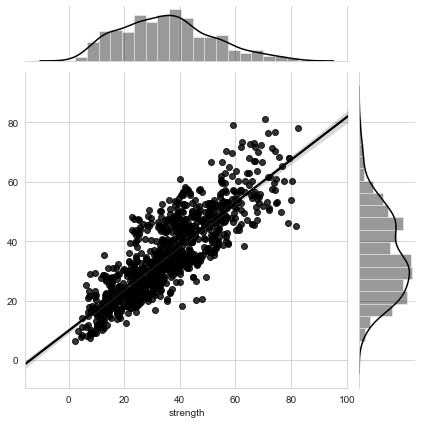

In [24]:
sns.jointplot(x=y, y=lr1_pred, kind="reg", color="k")

#### excluding ash

In [25]:
lr2 = LinearRegression()
lr2_scores = cross_val_score(lr2, x_sc.drop(["ash"],axis=1), y, cv=5)
lr2_pred = cross_val_predict(lr2, x_sc.drop(["ash"],axis=1), y, cv=5)

print(lr2_scores)
print("5-fold cv score: "+str(lr2_scores.mean()))

rmse = math.sqrt(np.mean((lr2_pred-y)**2))
print("root mean squared error: "+str(rmse))

[0.68251391 0.75353927 0.70045033 0.70108305 0.6408933 ]
5-fold cv score: 0.6956959723400574
root mean squared error: 8.900087197308906


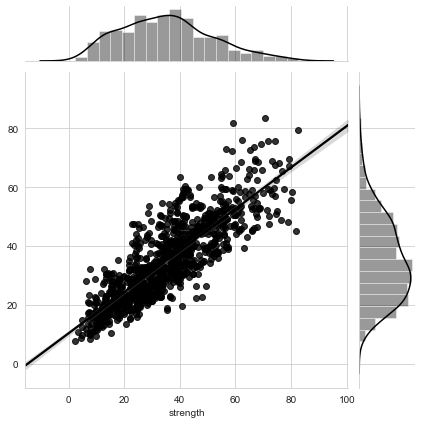

In [26]:
sns.jointplot(x=y, y=lr2_pred, kind="reg", color="k")

### As expected modelling with and without ash did not make any difference.  Other than ash we see that other features are also not good very predictors. Overall the model seems to be very underfit. We can improve the model performance by boosting and bagging techniques.

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

**bagging**

In [67]:
model = BaggingRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 8),
              "n_estimators": np.arange(10,150,5),
               "max_samples":[0.7,0.8,1.0],
               "bootstrap":[True,False]}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = BaggingRegressor(n_estimators=best["n_estimators"],max_features=best["max_features"],max_samples=best["max_samples"],bootstrap=best["bootstrap"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'bootstrap': False, 'max_features': 7, 'max_samples': 0.8, 'n_estimators': 130}

[0.87175771 0.92956661 0.86932868 0.90828655 0.90406163]
5-fold cv score avg: 0.896600234893724 +- 0.02
root mean squared error: 5.206527181474285


**randomforest**

In [72]:
model = RandomForestRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 8),
              "max_depth":list(np.arange(3,20))+[None],
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "n_estimators": np.arange(10,150,5),
              "max_samples":[0.7,0.8,1.0],
              "bootstrap":[True,False]}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = RandomForestRegressor(n_estimators=best["n_estimators"],min_samples_leaf=best["min_samples_leaf"],min_samples_split=best["min_samples_split"],max_depth=best["max_depth"],max_features=best["max_features"],max_samples=best["max_samples"],bootstrap=best["bootstrap"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'bootstrap': True, 'max_depth': 18, 'max_features': 6, 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 130}

[0.87189971 0.92728502 0.8777432  0.91175449 0.90189441]
5-fold cv score avg: 0.8981153657289009 +- 0.02
root mean squared error: 5.16582833301377


**gradientboost**

In [73]:
model = GradientBoostingRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 8),
              "max_depth":list(np.arange(3,20))+[None],
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "n_estimators": np.arange(10,150,5)}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = GradientBoostingRegressor(n_estimators=best["n_estimators"],min_samples_leaf=best["min_samples_leaf"],min_samples_split=best["min_samples_split"],max_depth=best["max_depth"],max_features=best["max_features"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 130}

[0.90528831 0.95211092 0.91045921 0.95019844 0.93477056]
5-fold cv score avg: 0.9305654867556399 +- 0.02
root mean squared error: 4.276273208030227


**Gradient boosting gives the best performance and least root mean squared error**

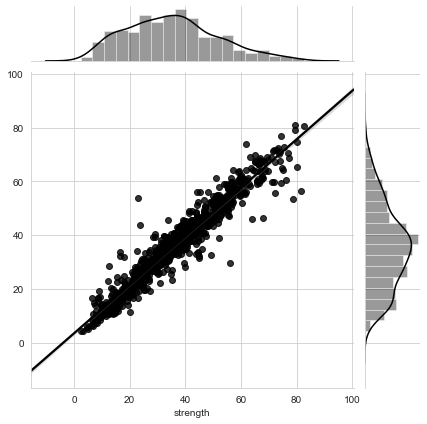

In [74]:
sns.jointplot(x=y, y=cl_pred, kind="reg", color="k")

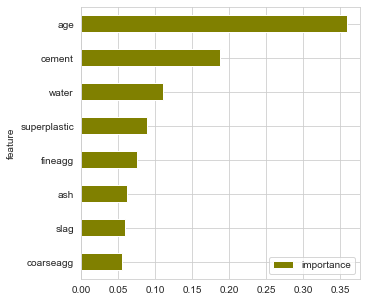

In [77]:
cl.fit(x_sc,y)
    
features = pd.DataFrame()
features['feature'] = x_sc.columns
features['importance'] = cl.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',color="olive", figsize=(5, 5))

**we can see a massive improvement after boosting !!**

# PART 2
we have seen that modelling with or without "ash" did not make much of a difference. But other features are not very good predictors either. In part 2 we will try to make our features more useful. To do this we will convert some features to categorical features and see if we are able to improve the performance. Above we found that 3 of the features have bimodal distribution:
- slag: bimodal distribution. 46% of the values are 0.0 i.e no slag in the mixture
- ash: again bimodal distribution. 53.8% of the values are 0.0 (no ash in the mixture)
- superplastic: bimodal distribution. 37.6% of the values are 0.0 (no superplastic in the mixture)

lets if we are able to improve the performance of the model by improvising these 3 features: **0 means no slag,ash and superplastic and 1 means with slag,ash and superplastic**

In [10]:
df['slag_cat']=0
df.loc[(df['slag']==0) ,'slag_cat']= 0
df.loc[(df['slag']!=0) ,'slag_cat']= 1

df["slag_cat"].value_counts()

1    535
0    470
Name: slag_cat, dtype: int64

In [11]:
df['ash_cat']=0
df.loc[(df['ash']==0) ,'ash_cat']= 0
df.loc[(df['ash']!=0) ,'ash_cat']= 1

df["ash_cat"].value_counts()

0    541
1    464
Name: ash_cat, dtype: int64

In [12]:
df['superplastic_cat']=0
df.loc[(df['superplastic']==0) ,'superplastic_cat']= 0
df.loc[(df['superplastic']!=0) ,'superplastic_cat']= 1

df["superplastic_cat"].value_counts()

1    627
0    378
Name: superplastic_cat, dtype: int64

**Also we will calculate total weight of the mixture and % weight of each element in the mixture. eg: % of water, % of cement, % of slag etc.**

In [13]:
df["total_mixture_wt"] = df["cement"]+df["slag"]+df["ash"]+df["water"]+df["superplastic"]+df["coarseagg"]+df["fineagg"]
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,slag_cat,ash_cat,superplastic_cat,total_mixture_wt
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1,0,0,2277.1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1,1,1,2381.5
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0,1,1,2356.7
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1,0,0,2210.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1,0,1,2284.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,0,1,1,2257.0
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,0,0,1,2447.1
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1,1,1,2309.6
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,1,0,0,2210.0


In [14]:
k=list(df.columns[0:7])

for element in k:
    col = element+" %"
    df[col] = round((df[element]/df["total_mixture_wt"])*100,2)


df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,slag_cat,ash_cat,superplastic_cat,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1,0,0,2277.1,6.21,9.31,0.00,8.94,0.00,42.68,32.87
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1,1,1,2381.5,7.09,1.77,5.22,6.65,0.45,45.38,33.43
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0,1,1,2356.7,10.61,0.00,4.06,7.95,0.23,40.60,36.54
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1,0,0,2210.0,12.04,5.16,0.00,10.32,0.00,42.17,30.32
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1,0,1,2284.7,6.78,8.03,0.00,8.46,0.40,45.84,30.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,0,1,1,2257.0,5.98,0.00,7.35,7.98,0.44,42.58,35.67
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,0,0,1,2447.1,21.71,0.00,0.00,5.79,1.15,34.82,36.52
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1,1,1,2309.6,11.97,5.02,3.91,7.78,0.39,37.67,33.27
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,1,0,0,2210.0,15.48,1.72,0.00,10.32,0.00,42.17,30.32


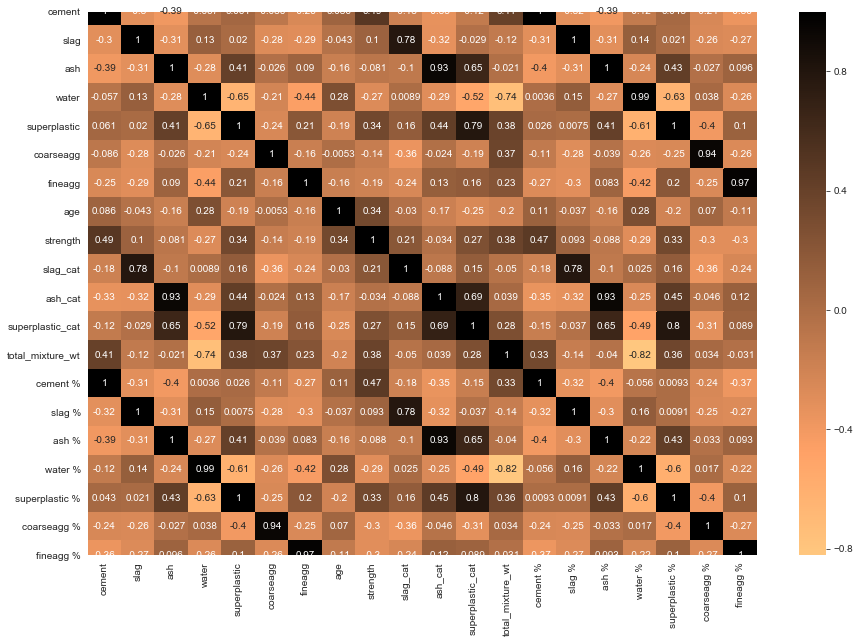

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="copper_r")

**we can see that the new features that we created can turn out to be useful. eg: total_mixture_wt has 0.38 correlation with target variable strength which can be useful. Likewise coarseagg% and fineagg% has improved correlation with strength as compared to coarseagg and fineagg.<br><br>Lets see if categorical columns will be useful or not. We will carry out anova test to see if there is a difference of strength b/w mixture with slag and no slag. Similarly, for mixture with and without ash and with and without superplastic.**<br><br> **Null hypothesis, Ho:** will be that there is no significant difference in strength for mixtures with respect to their categories.

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for feat in ["slag_cat","ash_cat","superplastic_cat"]:
    
    mod1 = ols(formula = 'strength ~ '+feat, data = df).fit()
    aov_table1 = sm.stats.anova_lm(mod1, typ=2)
    print(aov_table1)
    print("---------------------------------------------------------------------------------------------------")
    print("")

                 sum_sq      df          F        PR(>F)
slag_cat   11605.331048     1.0  45.710256  2.323621e-11
Residual  254650.661408  1003.0        NaN           NaN
---------------------------------------------------------------------------------------------------

                 sum_sq      df         F    PR(>F)
ash_cat      306.096374     1.0  1.154408  0.282887
Residual  265949.896082  1003.0       NaN       NaN
---------------------------------------------------------------------------------------------------

                         sum_sq      df          F        PR(>F)
superplastic_cat   19732.800366     1.0  80.284531  1.548921e-18
Residual          246523.192090  1003.0        NaN           NaN
---------------------------------------------------------------------------------------------------



**Rejecting the null hypothesis for slag_cat and superplastic_cat, we have significant evidence (at p=0.05) to prove that there is a difference in strength in mixture with/without slag and with/without superplastic. Hence these two categorical features seem to have a good relationship with the target variable strength and will be useful in modelling.<br> On the other hand, we cannot say the same about ash and since we fail to reject the null i.e we do not have sufficient evidence to say that adding ash or not will affect the strength of the mixture.**<br><br>Further, lets see how these categories are related to each other by chi square test of independence in pairs:<br>pair 1-slag_cat,ash_cat<br>pair 2-slag_cat,superplastic_cat<br>pair 3-ash_cat,superplastic_cat

In [17]:
import scipy.stats as stats

table1 = pd.crosstab(df['slag_cat'], df['ash_cat'], margins=True)
table2 = pd.crosstab(df['slag_cat'], df['superplastic_cat'], margins=True)
table3 = pd.crosstab(df['ash_cat'], df['superplastic_cat'], margins=True)

tables=[table1,table2,table3]
labels=["slag-ash","slag-superplastic","ash-superplastic"]

for label,table in zip(labels,tables):
    
    chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(table)
    print(label+":")
    print('Chi-square statistic: %3.5f, P value: %1.6f, Degrees of freedom: %d' %(chi_sq_Stat, p_value,deg_freedom))
    print("")

slag-ash:
Chi-square statistic: 7.78705, P value: 0.099698, Degrees of freedom: 4

slag-superplastic:
Chi-square statistic: 23.60101, P value: 0.000096, Degrees of freedom: 4

ash-superplastic:
Chi-square statistic: 484.53307, P value: 0.000000, Degrees of freedom: 4



**slag-ash (independent)**<br> At significance level of 0.05, we fail to reject the null i.e there is no sufficient evidence to prove that slag and ash are dependent variables.

**slag-superplastic (dependent)**<br> However at significance level of 0.05, we reject the null i.e there is sufficient evidence to prove that slag and superplastic are dependent on each other.

**ash-superplastic (dependent)**<br> Likewise at significance level of 0.05, we reject the null i.e there is sufficient evidence to prove that superplastic and ash are dependent on each other.

**we can see only two of the categorical pairs are independent of each other.**

### We can remove cement,slag,ash,water,superplastic,coarseagg and fineagg now that we have processed them into new features.
**Further down the line, we will apply clustering to find hidden patterns or groups in the data. Based on which we will do clustering analysis and group data according to the clusters. But before that we will transform categorical features to dummy variables and treat outliers.**

In [18]:
for feat in ["slag_cat","ash_cat","superplastic_cat"]:
    df[feat] = df[feat].astype("category")

In [19]:
df_temp = df.drop(list(df.columns[0:7]),axis=1) #saving in temp for analysis

df.drop(list(df.columns[0:7]),axis=1,inplace=True)
df=pd.get_dummies(df, columns=["slag_cat","ash_cat","superplastic_cat"])
df

,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1
0,28,29.89,2277.1,6.21,9.31,0.00,8.94,0.00,42.68,32.87,0,1,1,0,1,0
1,14,23.51,2381.5,7.09,1.77,5.22,6.65,0.45,45.38,33.43,0,1,0,1,0,1
2,28,29.22,2356.7,10.61,0.00,4.06,7.95,0.23,40.60,36.54,1,0,0,1,0,1
3,28,45.85,2210.0,12.04,5.16,0.00,10.32,0.00,42.17,30.32,0,1,1,0,1,0
4,28,18.29,2284.7,6.78,8.03,0.00,8.46,0.40,45.84,30.49,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,28,13.29,2257.0,5.98,0.00,7.35,7.98,0.44,42.58,35.67,1,0,0,1,0,1
1026,3,41.30,2447.1,21.71,0.00,0.00,5.79,1.15,34.82,36.52,1,0,1,0,0,1
1027,28,44.28,2309.6,11.97,5.02,3.91,7.78,0.39,37.67,33.27,0,1,0,1,0,1
1028,270,55.06,2210.0,15.48,1.72,0.00,10.32,0.00,42.17,30.32,0,1,1,0,1,0


**Detecting and treating outliers in numerical features. We will ignore outliers in "strength" since it is our target variable**

In [20]:
outliers_list = []
col_name = []
for col in df.columns[:10]:
    
    Q1 = np.percentile(a=df[col], q=25)
    Q3 = np.percentile(a=df[col], q=75)

    IQR = Q3 - Q1
    ul = Q3+(1.5*IQR) 
    ll = Q1-(1.5*IQR)
    
    print("outlier in feature: "+col+"("+str(len(df[(df[col]>ul) | (df[col]<ll)]))+")")
    if(len(df[(df[col]>ul) | (df[col]<ll)])>0):
        col_name.append(col)
        
    display(df[(df[col]>ul) | (df[col]<ll)])
    outliers_list=outliers_list + list(df[(df[col]>ul) | (df[col]<ll)].index.values)

outlier in feature: age(59)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1
51,180,39.00,2326.0,14.23,0.00,0.0,8.25,0.0,42.05,35.47,1,0,1,0,1,0
64,365,41.05,2229.0,14.92,6.39,0.0,10.23,0.0,41.81,26.65,0,1,1,0,1,0
93,180,41.84,2229.0,19.18,2.13,0.0,10.23,0.0,41.81,26.65,0,1,1,0,1,0
99,180,36.25,2229.0,10.66,10.66,0.0,10.23,0.0,41.81,26.65,0,1,1,0,1,0
103,180,53.10,2210.0,17.19,0.00,0.0,10.32,0.0,42.17,30.32,1,0,1,0,1,0
133,365,25.08,2282.0,10.34,0.00,0.0,8.46,0.0,42.42,38.78,1,0,1,0,1,0
144,180,26.74,2296.0,13.15,0.00,0.0,8.84,0.0,42.42,35.58,1,0,1,0,1,0
149,270,41.15,2229.0,17.05,4.26,0.0,10.23,0.0,41.81,26.65,0,1,1,0,1,0
152,180,29.59,2299.0,14.01,0.00,0.0,8.83,0.0,42.37,34.80,1,0,1,0,1,0
157,360,44.30,2326.9,8.53,5.69,0.0,8.25,0.0,42.05,35.48,0,1,1,0,1,0


outlier in feature: strength(8)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1
190,56,77.30,2428.6,14.93,7.78,0.0,6.79,0.48,38.90,31.12,0,1,1,0,0,1
192,28,81.75,2477.9,12.71,5.53,0.0,5.85,0.24,45.60,30.07,0,1,1,0,0,1
245,91,79.30,2428.6,14.93,7.78,0.0,6.79,0.48,38.90,31.12,0,1,1,0,0,1
257,56,79.40,2447.3,15.93,7.72,0.0,5.96,0.90,38.60,30.88,0,1,1,0,0,1
506,28,78.80,2402.3,18.77,0.00,0.0,6.87,0.47,42.88,31.01,1,0,1,0,0,1
732,28,79.99,2420.5,22.31,0.00,0.0,6.69,0.10,42.97,27.93,1,0,1,0,0,1
950,91,82.60,2447.3,15.93,7.72,0.0,5.96,0.90,38.60,30.88,0,1,1,0,0,1
1003,56,80.20,2403.2,13.47,11.77,0.0,7.65,0.43,39.23,27.46,0,1,1,0,0,1


outlier in feature: total_mixture_wt(1)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1
469,28,71.99,2551.0,19.01,0.0,0.0,5.72,0.0,43.9,31.36,1,0,1,0,1,0


outlier in feature: cement %(0)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1


outlier in feature: slag %(0)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1


outlier in feature: ash %(0)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1


outlier in feature: water %(4)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1
66,28,28.63,2201.0,10.77,4.18,3.23,11.22,0.27,38.76,31.58,0,1,0,1,0,1
263,28,28.63,2201.3,10.76,4.17,3.25,11.22,0.27,38.75,31.59,0,1,0,1,0,1
740,28,35.23,2200.0,6.36,7.45,5.82,10.77,0.27,39.50,29.82,0,1,0,1,0,1
826,28,35.23,2198.0,6.36,7.46,5.81,10.77,0.26,39.52,29.83,0,1,0,1,0,1


outlier in feature: superplastic %(10)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1
44,91,59.2,2447.1,21.71,0.00,0.0,5.79,1.15,34.82,36.52,1,0,1,0,0,1
156,28,56.4,2447.1,21.71,0.00,0.0,5.79,1.15,34.82,36.52,1,0,1,0,0,1
232,56,69.3,2448.8,19.15,4.79,0.0,5.63,1.31,34.80,34.32,0,1,1,0,0,1
292,91,70.7,2448.8,19.15,4.79,0.0,5.63,1.31,34.80,34.32,0,1,1,0,0,1
538,7,46.9,2447.1,21.71,0.00,0.0,5.79,1.15,34.82,36.52,1,0,1,0,0,1
744,7,54.9,2448.8,19.15,4.79,0.0,5.63,1.31,34.80,34.32,0,1,1,0,0,1
816,28,66.9,2448.8,19.15,4.79,0.0,5.63,1.31,34.80,34.32,0,1,1,0,0,1
838,56,58.8,2447.1,21.71,0.00,0.0,5.79,1.15,34.82,36.52,1,0,1,0,0,1
955,3,40.2,2448.8,19.15,4.79,0.0,5.63,1.31,34.80,34.32,0,1,1,0,0,1
1026,3,41.3,2447.1,21.71,0.00,0.0,5.79,1.15,34.82,36.52,1,0,1,0,0,1


outlier in feature: coarseagg %(0)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1


outlier in feature: fineagg %(0)


,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1


**Like before we will cap the outliers at upper limit(Q3+(1.5*IQR)) and lower limit(Q3+(1.5*IQR))**

In [21]:
features_to_cap=['water %','superplastic %','total_mixture_wt',"age"]

for feat in features_to_cap:
    
    Q1 = np.percentile(a=df[feat], q=25)
    Q3 = np.percentile(a=df[feat], q=75)
    IQR = Q3 - Q1
    ul = Q3+(1.5*IQR) 
    ll = Q1-(1.5*IQR)
    
    print("##### "+feat+" #####")
    print("lower limit: "+str(ll))
    print("upper limit: "+str(ul))
    print("total number of outliers to be treated: "+str(len(df[(df[feat]>ul) | (df[feat]<ll)])))

    df[feat][df[feat]>ul] = ul
    df[feat][df[feat]<ll] = ll

    print("after removing outliers:")
    print(len(df[(df[feat]>ul) | (df[feat]<ll)]))
    print("***************************************************************************************************************")

##### water % #####
lower limit: 4.960000000000001
upper limit: 10.48
total number of outliers to be treated: 4
after removing outliers:
0
***************************************************************************************************************
##### superplastic % #####
lower limit: -0.645
upper limit: 1.075
total number of outliers to be treated: 10
after removing outliers:
0
***************************************************************************************************************
##### total_mixture_wt #####
lower limit: 2141.1499999999996
upper limit: 2536.75
total number of outliers to be treated: 1
after removing outliers:
0
***************************************************************************************************************
##### age #####
lower limit: -66.5
upper limit: 129.5
total number of outliers to be treated: 59
after removing outliers:
0
***************************************************************************************************************


**Scaling and clustering**

In [22]:
df_sc = pd.DataFrame(StandardScaler().fit_transform(df))
df_sc.columns = df.columns
df_sc.head()

,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1
0,-0.281105,-0.329328,-0.995301,-1.310579,1.682465,-0.862324,1.055412,-1.049735,0.350559,-0.040188,-0.937286,0.937286,0.926105,-0.926105,1.287917,-1.287917
1,-0.671679,-0.721299,0.621448,-1.106477,-0.357524,1.033081,-1.063062,0.814048,1.237009,0.127501,-0.937286,0.937286,-1.079791,1.079791,-0.776448,0.776448
2,-0.281105,-0.370491,0.237393,-0.290066,-0.836407,0.611880,0.139565,-0.097135,-0.332336,1.058779,1.066910,-1.066910,-1.079791,1.079791,-0.776448,0.776448
3,-0.281105,0.651214,-2.034417,0.041601,0.559660,-0.862324,2.332047,-1.049735,0.183118,-0.803776,-0.937286,0.937286,0.926105,-0.926105,1.287917,-1.287917
4,-0.281105,-1.042003,-0.877606,-1.178377,1.336154,-0.862324,0.611365,0.606961,1.388034,-0.752870,-0.937286,0.937286,0.926105,-0.926105,-0.776448,0.776448


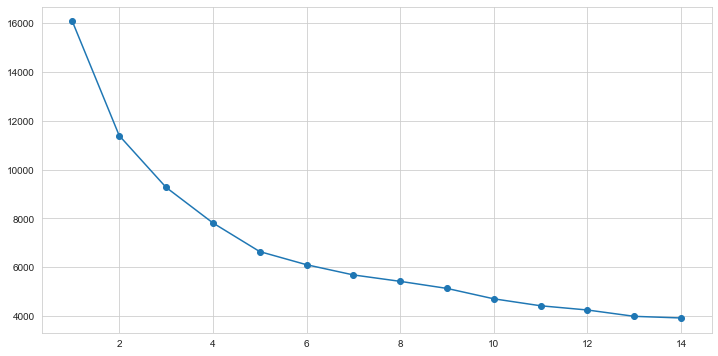

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
    

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5, random_state=7)
    clusters.fit(df_sc)
    labels = clusters.labels_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})

plt.figure(figsize=(12,6))
plt.plot(clusters_df["num_clusters"], clusters_df["cluster_errors"], marker = "o" )

**we see an elbow somewhere around 4-6.**

In [24]:
for k in [4,5,6]:
    
    kmeans = KMeans(n_clusters=k, n_init = 5, random_state=7)
    kmeans.fit(df_sc)
    silhouette_avg = silhouette_score(df_sc, kmeans.labels_,random_state=7)
    print("for k="+str(k))
    print("silhouette avg score: "+str(silhouette_avg))
    print("size of each cluster:")
    print(np.bincount(kmeans.labels_))
    print("")

for k=4
silhouette avg score: 0.30325342847723163
size of each cluster:
[406 216 196 187]

for k=5
silhouette avg score: 0.3119445048077463
size of each cluster:
[216 225 182 238 144]

for k=6
silhouette avg score: 0.3164069437465388
size of each cluster:
[208 225  54 238 145 135]



**6 seems to be the optimum no. of clusters**

In [25]:
kmeans = KMeans(n_clusters=6, n_init = 5, random_state=7)
kmeans.fit(df_sc)

KMeans(n_clusters=6, n_init=5, random_state=7)

In [26]:
df_temp["cluster_grp"] = kmeans.labels_+1
df["cluster_grp"] = kmeans.labels_+1
df_sc["cluster_grp"] = kmeans.labels_+1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001147AB5CC88>,
      dtype=object)

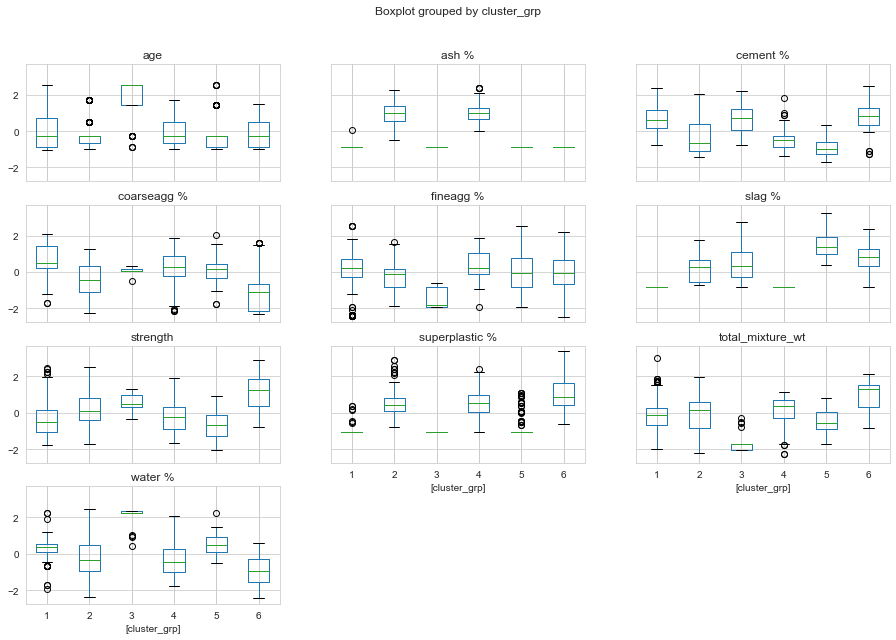

In [31]:
df_sc.drop(df_sc.columns[10:16],axis=1).boxplot(by='cluster_grp',figsize=(15,10))

In [29]:
df_temp.groupby(['cluster_grp']).mean()

,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %
cluster_grp,,,,,,,,,,
1,54.533654,29.592115,2342.555288,15.022548,0.000000,0.011923,8.143462,0.008029,43.562548,33.250577
2,31.071111,38.302044,2340.357333,10.632178,3.741867,5.015333,7.559022,0.375111,40.410667,32.265822
3,178.277778,44.713333,2226.692593,14.694259,4.823333,0.000000,10.154815,0.000000,41.947593,28.384444
4,37.226891,31.082731,2347.366387,9.851849,0.000000,5.276513,7.446345,0.378277,42.447479,34.597479
5,32.820690,24.352069,2313.347586,7.938000,8.321448,0.000000,8.327379,0.059241,42.114966,33.238690
6,33.377778,54.150000,2406.739259,15.657556,5.910444,0.000000,6.796370,0.530222,38.463407,32.642444


**We can see that the strength is better for the mixture in the 6th cluster. Given the strength of the mixture in cluster 6, we can point out some distinguished attributes of the this mixture:**
- **on an average mixtures in cluster 6 do not have ash. Avg ash% is 0.**
- **Avg cement% in cluster 6 is more as compared to other clusters around 15.65%.**
- **coarseagg% is lesser in this cluster as compared to other clusters while fineagg is almost in similar amount in all clusters**
- **superplastic% is higher in mixtures in cluster 6 compared to all other clusters.**
- **slag is around 6% on an average in the mixtures in cluster 6.**
- **on an avg the total weight of the mixture in cluster 6 is more. Mixtures in cluster 6 are heavier.**

**lets see how each feature would behave as a predictor**

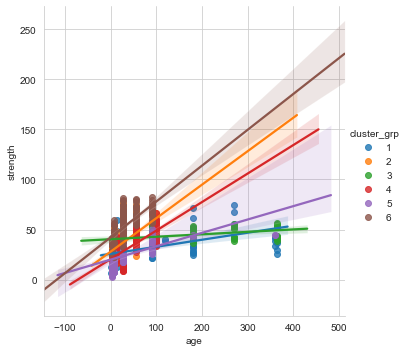

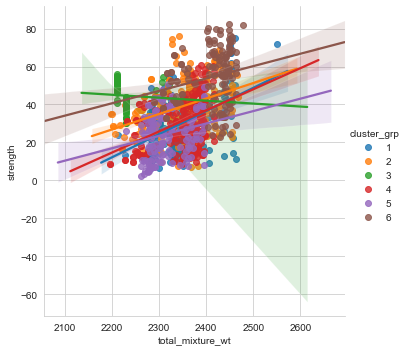

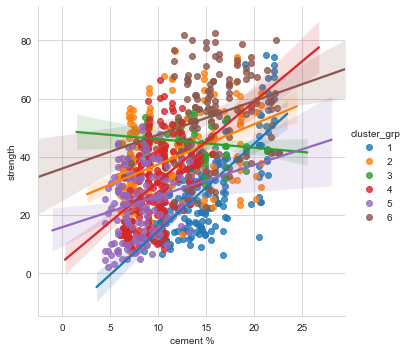

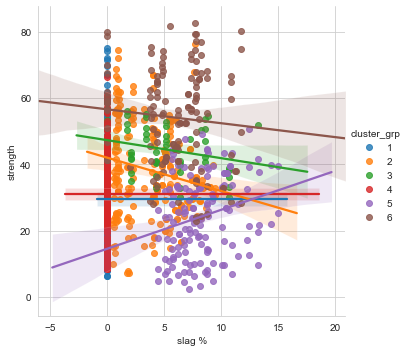

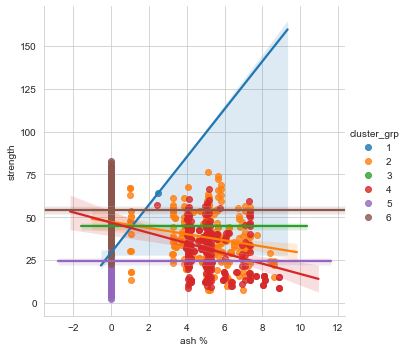

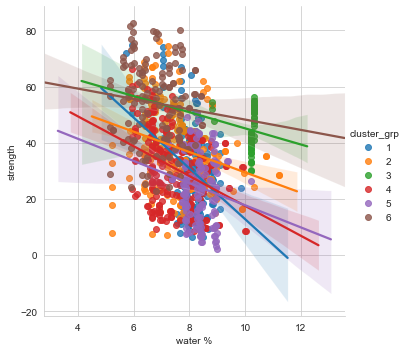

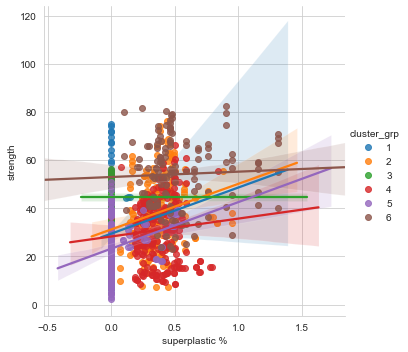

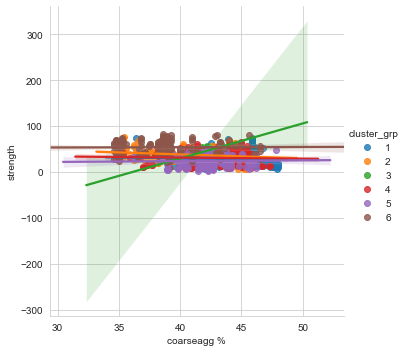

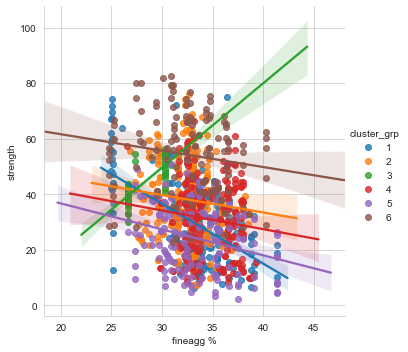

In [30]:
for col in df_temp.columns.drop(["strength","cluster_grp","slag_cat","ash_cat","superplastic_cat"]):
    plot = sns.lmplot(col,'strength',data=df_temp,hue='cluster_grp')

- Age seems to be a good predictor for all the clusters.<br>
- Total_mixture_wt also turned out to be a good predictor for all the clusters.<br>
- Again as expected cement% can be a good predictor of strength for all the clusters.<br>
- Slag has a very weak negative relationship with strength for all the clusters except for cluster 4.<br>
- As we have seen again and again, ash has very little predictive power.<br>
- water% will be a good predictor.<br>
- Superplastic% and coarseagg% would be weak predictors for most of the clusters.<br>
- Fineagg% can be a good predictor.<br>

### Lets see if the cluster_grp can be included in the feature set to predict strength by anova. Ho: there is no difference in strength b/w the 6 clusters

In [31]:
mod = ols(formula = 'strength ~ cluster_grp', data = df_temp).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df          F        PR(>F)
cluster_grp    8891.408689     1.0  34.651555  5.372788e-09
Residual     257364.583767  1003.0        NaN           NaN


**At significance of 0.05 we reject the null and can state that we have evidence to say that there is difference in strength between any one of the clusters. Lets see which clusters show significant difference in strength using tukeys HSD test:**

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df_temp['strength'], df_temp['cluster_grp']))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2   8.7099  0.001   4.9919  12.4279   True
     1      3  15.1212  0.001   9.2177  21.0247   True
     1      4   1.4906 0.8388  -2.1783   5.1595  False
     1      5    -5.24 0.0049  -9.4218  -1.0583   True
     1      6  24.5579  0.001  20.2858  28.8299   True
     2      3   6.4113 0.0225   0.5539  12.2687   True
     2      4  -7.2193  0.001 -10.8135  -3.6251   True
     2      5   -13.95  0.001 -18.0663  -9.8336   True
     2      6   15.848  0.001  11.6399   20.056   True
     3      4 -13.6306  0.001 -19.4569  -7.8043   True
     3      5 -20.3613  0.001 -26.5234 -14.1991   True
     3      6   9.4367  0.001   3.2129  15.6605   True
     4      5  -6.7307  0.001 -10.8027  -2.6586   True
     4      6  23.0673  0.001  18.9025   27.232   True
     5      6  29.7979  0.001   25.175  34.4209   True
----------

with reject=true in we can say that there is statistically significant difference in strength in all the pairs of clusters except for 1,4.<br>
Other than this pair all pairs of clusters have significant difference in strength.<br><br>**We can say that including cluster_grp in the feature set might be useful.**

In [33]:
df

,age,strength,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1,cluster_grp
0,28.0,29.89,2277.1,6.21,9.31,0.00,8.94,0.000,42.68,32.87,0,1,1,0,1,0,5
1,14.0,23.51,2381.5,7.09,1.77,5.22,6.65,0.450,45.38,33.43,0,1,0,1,0,1,2
2,28.0,29.22,2356.7,10.61,0.00,4.06,7.95,0.230,40.60,36.54,1,0,0,1,0,1,4
3,28.0,45.85,2210.0,12.04,5.16,0.00,10.32,0.000,42.17,30.32,0,1,1,0,1,0,3
4,28.0,18.29,2284.7,6.78,8.03,0.00,8.46,0.400,45.84,30.49,0,1,1,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,28.0,13.29,2257.0,5.98,0.00,7.35,7.98,0.440,42.58,35.67,1,0,0,1,0,1,4
1026,3.0,41.30,2447.1,21.71,0.00,0.00,5.79,1.075,34.82,36.52,1,0,1,0,0,1,6
1027,28.0,44.28,2309.6,11.97,5.02,3.91,7.78,0.390,37.67,33.27,0,1,0,1,0,1,2
1028,129.5,55.06,2210.0,15.48,1.72,0.00,10.32,0.000,42.17,30.32,0,1,1,0,1,0,3


### Above we have the data on which we will make models again. As we know, we have improvised some features and added a few more features. This time instead of manually deciding on which features to keep and which to drop, we will let the models decide for themselves based on training.

In [35]:
x=df.drop("strength",axis=1)
y=df["strength"]

print(x.shape)

(1005, 16)


**Now we will prepare the feature set for modelling. We will one-hot encode cluster_grp feature and robust scale the data to bring the features on the same scale**

In [36]:
x["cluster_grp"] = x["cluster_grp"].astype("category")
x=pd.get_dummies(x, columns=["cluster_grp"], drop_first=True)

x_sc = pd.DataFrame(RobustScaler().fit_transform(x))
x_sc.columns = x.columns
x_sc.head()

,age,total_mixture_wt,cement %,slag %,ash %,water %,superplastic %,coarseagg %,fineagg %,slag_cat_0,slag_cat_1,ash_cat_0,ash_cat_1,superplastic_cat_0,superplastic_cat_1,cluster_grp_2,cluster_grp_3,cluster_grp_4,cluster_grp_5,cluster_grp_6
0,0.000000,-0.720930,-0.797277,1.379870,0.000000,0.768116,-0.627907,0.156566,-0.042254,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0
1,-0.285714,0.334681,-0.664145,0.155844,1.033663,-0.891304,0.418605,0.838384,0.089202,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.000000,0.083923,-0.131619,-0.131494,0.803960,0.050725,-0.093023,-0.368687,0.819249,1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,-1.399393,0.084720,0.706169,0.000000,1.768116,-0.627907,0.027778,-0.640845,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,-0.644085,-0.711044,1.172078,0.000000,0.420290,0.302326,0.954545,-0.600939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**lets build some models**

In [161]:
lr1 = LinearRegression()
lr1_scores = cross_val_score(lr1, x_sc, y, cv=5)
lr1_pred = cross_val_predict(lr1, x_sc, y, cv=5)

print(lr1_scores)
print("5-fold cv score: "+str(lr1_scores.mean()))

rmse = math.sqrt(np.mean((lr1_pred-y)**2))
print("root mean squared error: "+str(rmse))

[0.73191573 0.80158257 0.72342906 0.73026712 0.6877109 ]
5-fold cv score: 0.7349810768970491
root mean squared error: 8.306425970661564


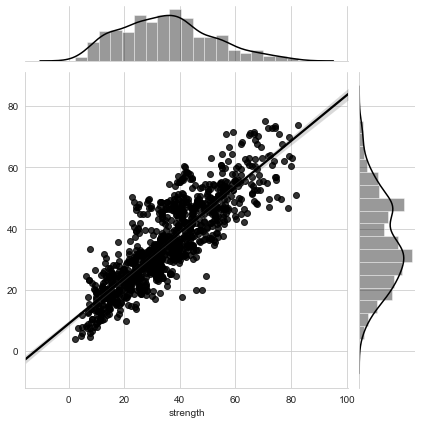

In [162]:
sns.jointplot(x=y, y=lr1_pred, kind="reg", color="k")

With the new features the linear regression model improved from 71% to 73% however the root mean squared error remains approximately the same. This shows that there is NO significant improvement in the linear regression model. The R^2 value is bound to increase from 71% to 73% because we added more features.<br>**Lets see try bagging and boosting techniques as before to see if adding/improvising  the features made any difference or not:**

**bagging (same performance as before)**

In [164]:
model = BaggingRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 20),
              "n_estimators": np.arange(10,150,5),
               "max_samples":[0.7,0.8,1.0],
               "bootstrap":[True,False]}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = BaggingRegressor(n_estimators=best["n_estimators"],max_features=best["max_features"],max_samples=best["max_samples"],bootstrap=best["bootstrap"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'bootstrap': True, 'max_features': 18, 'max_samples': 1.0, 'n_estimators': 90}

[0.89119182 0.92363935 0.85532774 0.89524939 0.8982414 ]
5-fold cv score avg: 0.8927299370177819 +- 0.02
root mean squared error: 5.309122154024492


**randomforest (same performance as before)**

In [165]:
model = RandomForestRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 20),
              "max_depth":list(np.arange(3,45))+[None],
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "n_estimators": np.arange(10,150,5),
              "max_samples":[0.7,0.8,1.0],
              "bootstrap":[True,False]}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = RandomForestRegressor(n_estimators=best["n_estimators"],min_samples_leaf=best["min_samples_leaf"],min_samples_split=best["min_samples_split"],max_depth=best["max_depth"],max_features=best["max_features"],max_samples=best["max_samples"],bootstrap=best["bootstrap"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'bootstrap': False, 'max_depth': 35, 'max_features': 12, 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 40}

[0.88503421 0.92538782 0.86166413 0.8892235  0.89711019]
5-fold cv score avg: 0.8916839709708491 +- 0.02
root mean squared error: 5.324135739518862


**gradient boost (same performance as before)**

In [166]:
model = GradientBoostingRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 20),
              "max_depth":list(np.arange(3,45))+[None],
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "n_estimators": np.arange(10,150,5)}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = GradientBoostingRegressor(n_estimators=best["n_estimators"],min_samples_leaf=best["min_samples_leaf"],min_samples_split=best["min_samples_split"],max_depth=best["max_depth"],max_features=best["max_features"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'max_depth': 41, 'max_features': 5, 'min_samples_leaf': 15, 'min_samples_split': 11, 'n_estimators': 125}

[0.89784013 0.9547225  0.89270746 0.94385247 0.93728888]
5-fold cv score avg: 0.9252822878579403 +- 0.03
root mean squared error: 4.440449189157351


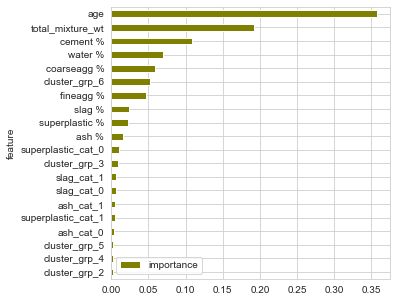

In [167]:
cl.fit(x_sc,y)
    
features = pd.DataFrame()
features['feature'] = x_sc.columns
features['importance'] = cl.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',color="olive", figsize=(5, 5))

**Looking at the performance of the above models we can say that the new features that we added were not really effective. The performance is exactly same.<br>
However, not all of the features that we created/improvised were useless. Total_mixture_wt and cluster_grp were usefull**.

# PART 3
**In part 3 we will go back to the old feature set while retaining total_mixture_wt and cluster_grp and see if we can beat the best performance uptill now.<br>**
Best performance: Gradient boosting (part 1),<br> 5-fold score = 93.05%,<br> rmse = 4.27

In [27]:
df=pd.read_csv("concrete.csv")
df.drop_duplicates(keep='first', inplace=True)
print("Dropped! There are "+str(len(df[df.duplicated(keep=False)]))+" duplicate values")
print(df.shape)
df[df.duplicated(keep=False)]

Dropped! There are 0 duplicate values
(1005, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


**Creating total_mixture_wt and adding cluster_grp from our clustering results. Also, One-hot encoding the cluster_grp feature and seperating feature set with target variable.**

In [28]:
df["total_mixture_wt"] = df["cement"]+df["slag"]+df["ash"]+df["water"]+df["superplastic"]+df["coarseagg"]+df["fineagg"]
df["cluster_grp"] = kmeans.labels_+1

df["cluster_grp"] = df["cluster_grp"].astype("category")
df=pd.get_dummies(df, columns=["cluster_grp"], drop_first=True)

x=df.drop(["strength"], axis=1)
y=df["strength"]

x.shape

(1005, 14)

**Detecting and treating outliers in the numerical features**

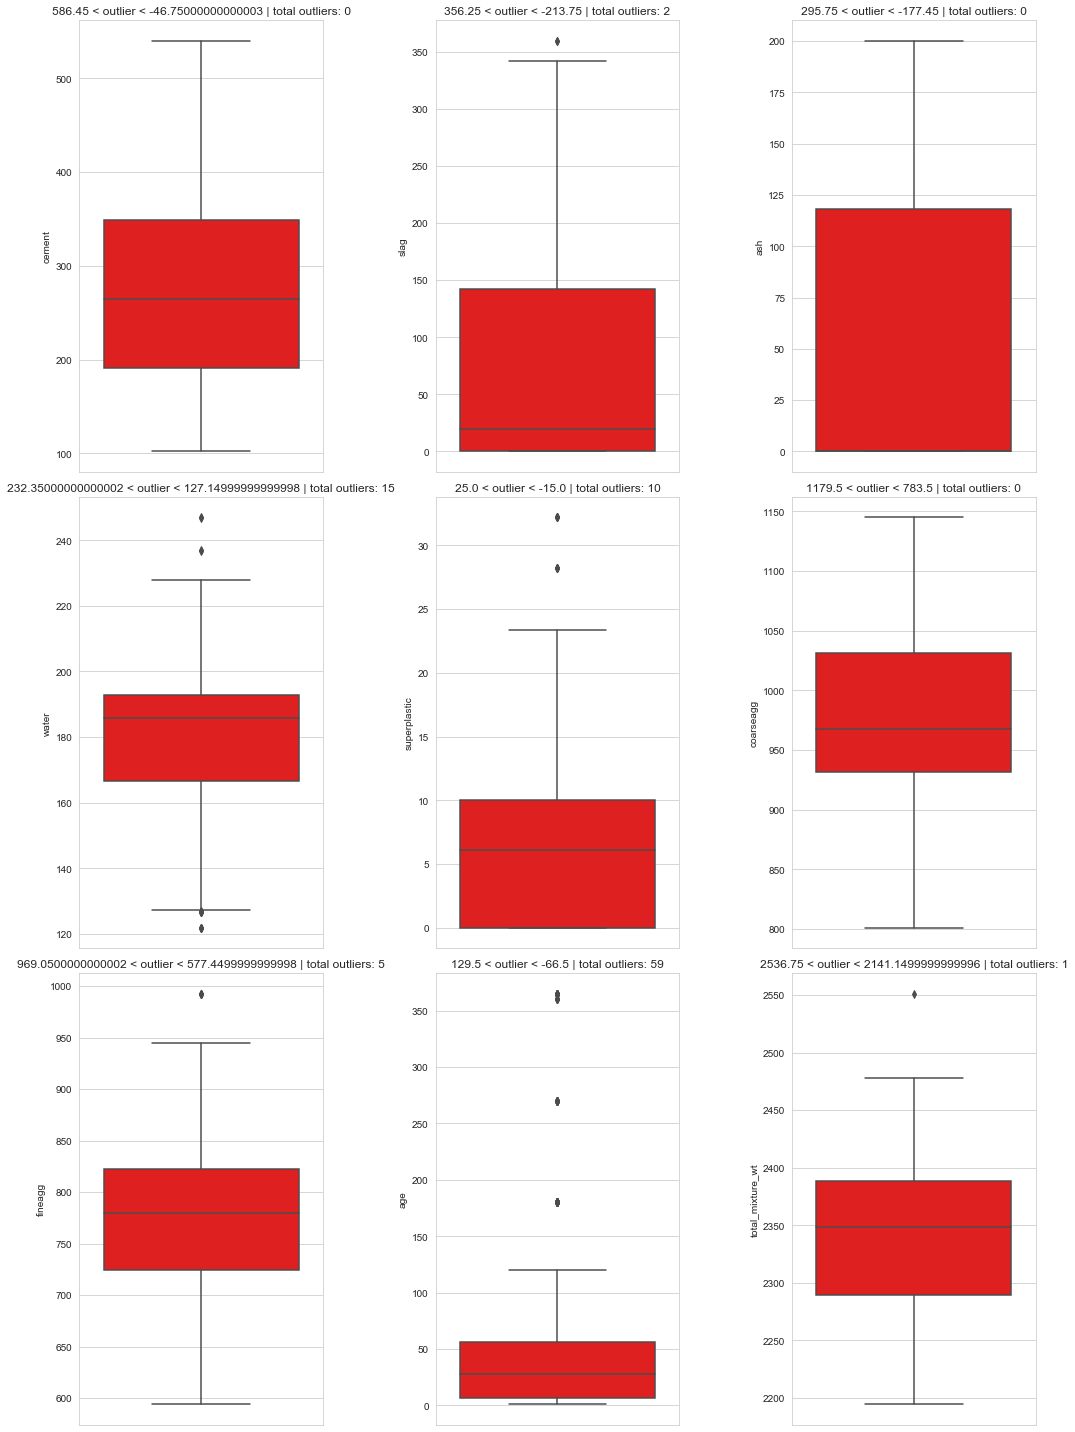

In [29]:
fig, ax =plt.subplots(nrows=3,ncols=3,figsize=(15, 20))

col=0
for i in range(0,3):
    for j in range(0,3):
        Q1 = np.percentile(a=x[x.columns[col]], q=25)
        Q3 = np.percentile(a=x[x.columns[col]], q=75)

        IQR = Q3 - Q1
        ul = Q3+(1.5*IQR) 
        ll = Q1-(1.5*IQR)
        total = len(x[(x[x.columns[col]]>ul) | (x[x.columns[col]]<ll)])

        sns.boxplot(y=x[x.columns[col]],data=x,ax=ax[i][j],color="red")
        ax[i][j].set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
        col=col+1

fig.show()
plt.tight_layout()

**Like before capping and upperlimit and lower limit**

In [30]:
features_to_cap=['slag','water','superplastic','total_mixture_wt','fineagg',"age"]

for feat in features_to_cap:
    
    Q1 = np.percentile(a=x[feat], q=25)
    Q3 = np.percentile(a=x[feat], q=75)
    IQR = Q3 - Q1
    ul = Q3+(1.5*IQR) 
    ll = Q1-(1.5*IQR)
    
    print("##### "+feat+" #####")
    print("lower limit: "+str(ll))
    print("upper limit: "+str(ul))
    print("total number of outliers to be treated: "+str(len(x[(x[feat]>ul) | (x[feat]<ll)])))

    x[feat][x[feat]>ul] = ul
    x[feat][x[feat]<ll] = ll

    print("after removing outliers:")
    print(len(x[(x[feat]>ul) | (x[feat]<ll)]))
    print("***************************************************************************************************************")

##### slag #####
lower limit: -213.75
upper limit: 356.25
total number of outliers to be treated: 2
after removing outliers:
0
***************************************************************************************************************
##### water #####
lower limit: 127.14999999999998
upper limit: 232.35000000000002
total number of outliers to be treated: 15
after removing outliers:
0
***************************************************************************************************************
##### superplastic #####
lower limit: -15.0
upper limit: 25.0
total number of outliers to be treated: 10
after removing outliers:
0
***************************************************************************************************************
##### total_mixture_wt #####
lower limit: 2141.1499999999996
upper limit: 2536.75
total number of outliers to be treated: 1
after removing outliers:
0
******************************************************************************************************

**Scaling**

In [31]:
x_sc = pd.DataFrame(RobustScaler().fit_transform(x))
x_sc.columns = x.columns
x_sc.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,total_mixture_wt,cluster_grp_2,cluster_grp_3,cluster_grp_4,cluster_grp_5,cluster_grp_6
0,-0.781428,1.347368,0.000000,0.676806,-0.61,0.038384,-0.321757,0.000000,-0.720930,0.0,0.0,0.0,1.0,0.0
1,-0.607075,0.155789,1.050719,-1.041825,0.47,1.139394,0.165475,-0.285714,0.334681,1.0,0.0,0.0,0.0,0.0
2,-0.094757,-0.140351,0.808960,0.064639,-0.06,-0.112121,0.829418,0.000000,0.083923,0.0,0.0,1.0,0.0,0.0
3,0.006317,0.659649,0.000000,1.608365,-0.61,-0.363636,-1.123596,0.000000,-1.399393,0.0,1.0,0.0,0.0,0.0
4,-0.696147,1.146667,0.000000,0.288973,0.30,0.802020,-0.850868,0.000000,-0.644085,0.0,0.0,0.0,1.0,0.0


**Building models**

In [44]:
lr1 = LinearRegression()
lr1_scores = cross_val_score(lr1, x_sc, y, cv=5)
lr1_pred = cross_val_predict(lr1, x_sc, y, cv=5)

print(lr1_scores)
print("5-fold cv score: "+str(lr1_scores.mean()))

rmse = math.sqrt(np.mean((lr1_pred-y)**2))
print("root mean squared error: "+str(rmse))

[0.7169536  0.78699204 0.72678143 0.72358761 0.68064958]
5-fold cv score: 0.7269928498760502
root mean squared error: 8.426931015182083


**Boosting and Bagging tree models:**<br><br>
**Bagging (performance decreased)**

In [47]:
model = BaggingRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 9),
              "n_estimators": np.arange(10,150,5),
               "max_samples":[0.7,0.8,1.0],
               "bootstrap":[True,False]}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = BaggingRegressor(n_estimators=best["n_estimators"],max_features=best["max_features"],max_samples=best["max_samples"],bootstrap=best["bootstrap"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'bootstrap': False, 'max_features': 8, 'max_samples': 0.7, 'n_estimators': 10}

[0.86165775 0.86962772 0.79088178 0.86300009 0.85255023]
5-fold cv score avg: 0.8475435144345813 +- 0.03
root mean squared error: 6.347210425144913


**randomforest (a little bit improvement in 5-fold score and rmse)**

In [48]:
model = RandomForestRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 9),
              "max_depth":list(np.arange(3,35))+[None],
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "n_estimators": np.arange(10,150,5),
              "max_samples":[0.7,0.8,1.0],
              "bootstrap":[True,False]}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = RandomForestRegressor(n_estimators=best["n_estimators"],min_samples_leaf=best["min_samples_leaf"],min_samples_split=best["min_samples_split"],max_depth=best["max_depth"],max_features=best["max_features"],max_samples=best["max_samples"],bootstrap=best["bootstrap"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'bootstrap': False, 'max_depth': 25, 'max_features': 5, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 55}

[0.88729144 0.91522823 0.86649868 0.88835591 0.90209903]
5-fold cv score avg: 0.8918946598676312 +- 0.02
root mean squared error: 5.3186845015828


**Gradient boost (score improved from 93.05% in part 1 to 93.2% and rmse decreased from 4.27 to 4.22)**

In [49]:
model = GradientBoostingRegressor(random_state=7)

param_dist = {"max_features": sp_randint(1, 9),
              "max_depth":list(np.arange(3,35))+[None],
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "n_estimators": np.arange(10,150,5)}
 
randomCV = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200,cv=5,random_state=7)
randomCV.fit(x_sc, y)


best = randomCV.best_params_
print(best)
print("")


cl = GradientBoostingRegressor(n_estimators=best["n_estimators"],min_samples_leaf=best["min_samples_leaf"],min_samples_split=best["min_samples_split"],max_depth=best["max_depth"],max_features=best["max_features"],random_state=7)
cl_scores = cross_val_score(cl, x_sc, y, cv=5)
cl_pred = cross_val_predict(cl, x_sc, y, cv=5)

print(cl_scores)
print("5-fold cv score avg: "+str(cl_scores.mean())+" +- "+str(round(cl_scores.std(),2)))

rmse = math.sqrt(np.mean((cl_pred-y)**2))
print("root mean squared error: "+str(rmse))

{'max_depth': 22, 'max_features': 3, 'min_samples_leaf': 13, 'min_samples_split': 20, 'n_estimators': 135}

[0.89991459 0.95451508 0.9096392  0.94889261 0.94697932]
5-fold cv score avg: 0.9319881599304901 +- 0.02
root mean squared error: 4.229788954373861


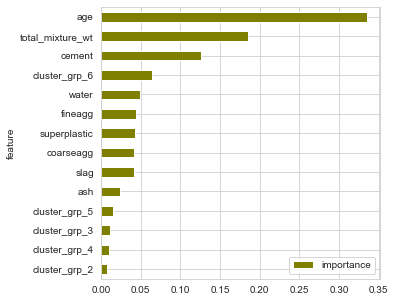

In [50]:
cl.fit(x_sc,y)
    
features = pd.DataFrame()
features['feature'] = x_sc.columns
features['importance'] = cl.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh',color="olive", figsize=(5, 5))

# conclusion:
### We retained the cluster_grp and total_mixture_wt. The model performance is more or less same with/without these two features (slight improvement with cluster_grp and total_mixture_wt). However, if we look at the feature importances of our best model (gradient boosting model), total_mixture_wt and cluster_grp are ranked above many of the already existing features. 

### Therefore we choose to keep total_mixture_wt and cluster_grp in our feature set and choose gradient boost to be the best approach with 5-fold cv score of  93% and root mean squared error of 4.27
###### 95% C.I using bootstrap sampling

In [32]:
x_sc['strength'] = np.array(y)

In [33]:
x_sc.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplastic        0
coarseagg           0
fineagg             0
age                 0
total_mixture_wt    0
cluster_grp_2       0
cluster_grp_3       0
cluster_grp_4       0
cluster_grp_5       0
cluster_grp_6       0
strength            0
dtype: int64

In [168]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

n_iterations = 500
n_size = int(len(values))
values = x_sc.values


scores = list()
for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    
    test = []
    for i in values:
        if(i.tolist() not in train.tolist()):
            test.append(i)

    test = np.array(test)
    
    # fit model
    cl = GradientBoostingRegressor(n_estimators=135,min_samples_leaf=13,min_samples_split=20,max_depth=22,max_features=3,random_state=7)
    cl.fit(train[:,:-1], train[:,-1])
    #train[:,:-1] means all the columns except last(leaving target column-class)
    #train[:,-1] means taking only last column(target column-class)

    score = cl.score(test[:,:-1], test[:,-1])
    scores.append(score)


scores

[0.8956113651618491,
 0.908974751690756,
 0.9160246159925259,
 0.9381760205864501,
 0.91815447389524,
 0.9210036473035951,
 0.9212323084950951,
 0.9115262209976926,
 0.9141226924257657,
 0.9275945321571668,
 0.9207552276203443,
 0.9065404587913783,
 0.9170788024168909,
 0.8867317042491981,
 0.9210007307271515,
 0.9385287953986761,
 0.9194026204027526,
 0.9240859552583042,
 0.9346200265630853,
 0.9327996075668469,
 0.9231607668707763,
 0.9140927210860618,
 0.9174826213790429,
 0.8953684926824432,
 0.9285145296377614,
 0.9360301700700329,
 0.9071487867398401,
 0.9122092716600767,
 0.9319543591173507,
 0.9458474117833253,
 0.9337611423709604,
 0.9088421752424064,
 0.9199899082787591,
 0.9236683434542153,
 0.9370945187582129,
 0.9434398090010018,
 0.9192301406511139,
 0.9197444071325305,
 0.9007700285932305,
 0.9110678629158786,
 0.932509862793601,
 0.900328418209942,
 0.9196489125862831,
 0.8898796219704381,
 0.9203312743553955,
 0.9130757068642414,
 0.9131276495521408,
 0.876856220813833

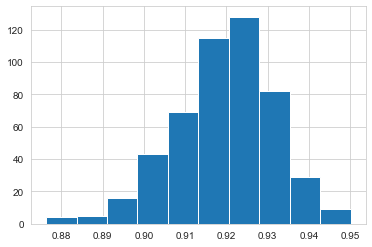

95.0 confidence interval 89.5% and 94.0%


In [169]:
# plot scores
pyplot.hist(scores)
pyplot.show()

# confidence intervals
alpha = 0.95 #for 95% confidence 
p = ((1.0-alpha)/2.0) * 100 #tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [170]:
upper = np.mean(scores)+(1.96*np.std(scores))
upper

0.9430281364813639

In [171]:
lower = np.mean(scores)-(1.96*np.std(scores))
lower

0.8958038666132785

## The model will give performance b/w 89.6% and 94.3% for 95% of the times